# Homework 4

Maksim Nikiforov

## Part 1 - Summarizing student data

### Task 1 - Read in the data

In [84]:
import pandas as pd

# Read data locally and specify semicolon as delimiter
math_data = pd.read_csv("student-mat.csv", delimiter=';')

### Task 2 - Summarize the data

#### Categorical variables

In [58]:
# Convert some of the categorical variables into category type variables
math_data.school = math_data.school.astype("category")
math_data.sex = math_data.sex.astype("category")
math_data.address = math_data.address.astype("category")
math_data.Pstatus = math_data.Pstatus.astype("category")
math_data.Medu = math_data.Medu.astype("category")
math_data.Fedu = math_data.Fedu.astype("category")
math_data.Mjob = math_data.Mjob.astype("category")
math_data.Fjob = math_data.Fjob.astype("category")
math_data.reason = math_data.reason.astype("category")
math_data.guardian = math_data.guardian.astype("category")
math_data.studytime = math_data.studytime.astype("category")
math_data.traveltime = math_data.traveltime.astype("category")
math_data.schoolsup = math_data.schoolsup.astype("category")
math_data.famsup = math_data.famsup.astype("category")
math_data.paid = math_data.paid.astype("category")
math_data.activities = math_data.activities.astype("category")
math_data.higher = math_data.higher.astype("category")
math_data.romantic = math_data.romantic.astype("category")
math_data.freetime = math_data.freetime.astype("category")
math_data.goout = math_data.goout.astype("category")
math_data.health = math_data.health.astype("category")
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [35]:
# Create a one-way contingency table
math_data.address.value_counts()

U    307
R     88
Name: address, dtype: int64

In this one-way contingency table, we see that most student in the data set - 307 - live live in an urban home. The remaining 88 students live in a rural home.

In [36]:
# Create a two-way contingency table
pd.crosstab(math_data.sex, math_data.higher, margins=True)

higher,no,yes,All
sex,,,
F,4,204,208
M,16,171,187
All,20,375,395


In this two-way contingency table, we see that the data includes information on 208 females and 187 males. Only 4 females and 16 males do not wish to pursue higher education.  

In [37]:
# Create a three-way contingency table
pd.crosstab(
    [math_data.guardian, math_data.famsup],
    math_data.sex,
    margins=True
)

sex                F    M  All
guardian famsup               
father   no       13   21   34
         yes      30   26   56
mother   no       46   61  107
         yes      99   67  166
other    no        7    5   12
         yes      13    7   20
All              208  187  395

The majority of students list "mother" as their guardian. In this subgroup, 99 females receive family educational support and 46 do not. The males are more evenly split; 67 males with "mother" as their guardian receive family educational support, and 61 do not. 

In [43]:
# Create a conditional two-way table by 
# subsetting the data (say with .loc) and then creating the two-way table

# Subset data with .loc to include only two columns: reason behind school choice and student's sex 
school_choice_reason = math_data.loc[:, ["reason", "sex"]] 

# Create the two-way table
pd.crosstab(school_choice_reason.reason, school_choice_reason.sex, margins=True)

sex,F,M,All
reason,,,
course,72,73,145
home,53,56,109
other,18,18,36
reputation,65,40,105
All,208,187,395


Here, we see that the majority of students (145) selected their school because of course preference, followed by proximity to home (109) and school reputation (105). 

In [59]:
# Create a conditional two-way table by 
# creating a three-way table and subsetting it

# Create the three-way contingency table
study_activities_tab = pd.crosstab(
    [math_data.studytime, math_data.activities],
    math_data.sex,
    margins=True
)

study_activities_tab

sex                     F    M  All
studytime activities               
1         no           16   43   59
          yes          11   35   46
2         no           64   31   95
          yes          49   54  103
3         no           24    5   29
          yes          27    9   36
4         no            8    3   11
          yes           9    7   16
All                   208  187  395

In [74]:
# Subset three-way table for females only to include 
# bivariate information on study time and participation in extracurricular activities
study_activities_tab.loc[:, "F"]

studytime  activities
1          no             16
           yes            11
2          no             64
           yes            49
3          no             24
           yes            27
4          no              8
           yes             9
All                      208
Name: F, dtype: int64

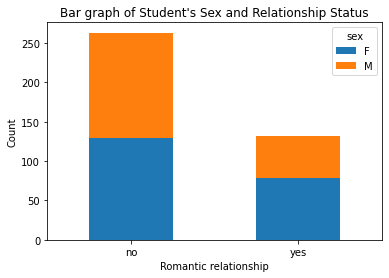

In [83]:
# Create a stacked bar graph. 
# Give relevant x and y labels, and a title for the plots.

# Import pyplot submodule
import matplotlib.pyplot as plt

table = pd.crosstab(math_data.romantic, math_data.sex)
table.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.xlabel("Romantic relationship")
plt.ylabel("Count")
plt.title("Bar graph of Student's Sex and Relationship Status")
plt.show()
plt.close()

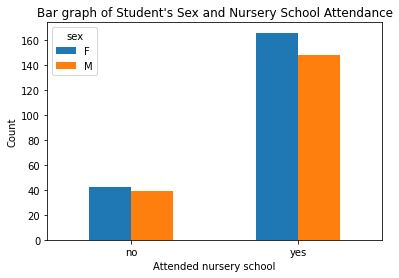

In [82]:
# Create a side-by-side bar graph. 
# Give relevant x and y labels, and a title for the plots.
table = pd.crosstab(math_data.nursery, math_data.sex)
table.plot.bar()
plt.xticks(rotation = 0)
plt.xlabel("Attended nursery school")
plt.ylabel("Count")
plt.title("Bar graph of Student's Sex and Nursery School Attendance")
plt.show()
plt.close()

#### Numeric variables (and across groups)

In [86]:
# Find measures of center and spread for age

# Center
math_data["age"].mean()

1.2760427246056283

In [87]:
# Spread
math_data["age"].std()

1.2760427246056283

In [88]:
# Find measures of center and spread for absences

# Center
math_data["absences"].mean()

5.708860759493671

In [89]:
# Spread
math_data["absences"].std()

8.00309568710818

In [90]:
# Find measures of center and spread for G3

# Center
math_data["G3"].mean()

10.415189873417722

In [91]:
# Spread
math_data["G3"].std()

4.5814426109978434

In [98]:
# Find measures of center and spread across a single grouping variable for three of these variables
# (including G3 as one of them)

import numpy as np

math_data \
.groupby("sex") \
.agg(
    mean_age = ("age", np.mean), 
    mean_absences = ("absences", np.mean),
    mean_G3 = ("G3", np.mean),
    std_age = ("age", np.std),
    std_absences = ("absences", np.std),
    std_G3 = ("G3", np.std)
)

,mean_age,mean_absences,mean_G3,std_age,std_absences,std_G3
sex,,,,,,
F,16.730769,6.216346,9.966346,1.201696,9.445819,4.622338
M,16.657754,5.144385,10.914439,1.356181,5.980749,4.495297


In [100]:
# Find measures of center and spread across two grouping variables for three of these variables 
# (including G3 as one of them)

math_data \
.groupby(["sex", "address"]) \
.agg(
    mean_age = ("age", np.mean), 
    mean_absences = ("absences", np.mean),
    mean_G3 = ("G3", np.mean),
    std_age = ("age", np.std),
    std_absences = ("absences", np.std),
    std_G3 = ("G3", np.std)
)

mean_age  mean_absences    mean_G3   std_age  std_absences  \
sex address                                                                
F   R        16.977273       7.454545   9.272727  1.229268     12.704979   
    U        16.664634       5.884146  10.152439  1.189305      8.378617   
M   R        17.113636       4.795455   9.750000  1.333223      4.521677   
    U        16.517483       5.251748  11.272727  1.336662      6.372773   

               std_G3  
sex address            
F   R        4.447961  
    U        4.663649  
M   R        4.700940  
    U        4.384964

In [105]:
# Create a correlation matrix between all of the numeric variables.
# The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

math_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


Text(0.5, 0, 'Grades')

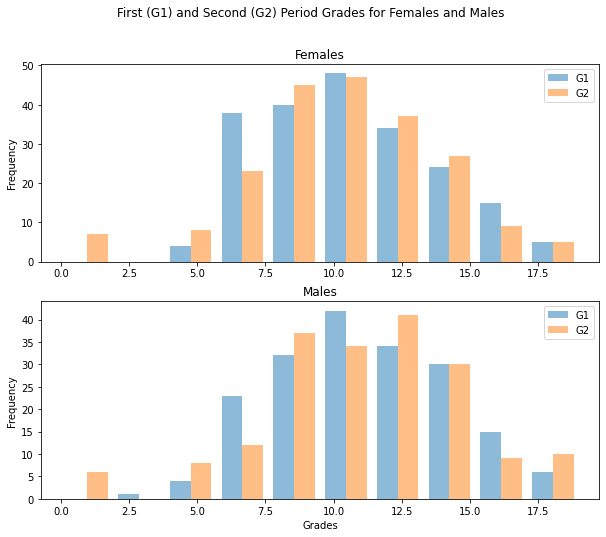

In [127]:
# Create a histogram for two of the numeric variables across one of the
# categorical variables

# Create a data frame with two numeric variables and one categotical variable
grade_DF = math_data[["G1", "G2", "sex"]]

# Create histogram
grade_histo = grade_DF.plot.hist(alpha=0.5, by="sex", figsize=(10, 8), title=['Females', 'Males'])
plt.suptitle('First (G1) and Second (G2) Period Grades for Females and Males')
plt.xlabel("Grades")

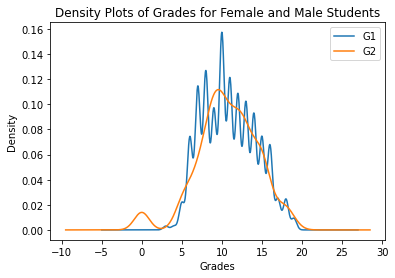

In [130]:
# Create a kernel density plot for two of the numeric variables across one of the
# categorical variables

math_data.G1.plot.density(bw_method=0.1, label = "G1")
math_data.G2.plot.density(bw_method=0.25, label = "G2")

plt.xlabel("Grades")
plt.title("Density Plots of Grades for Female and Male Students")
plt.legend()
plt.show()
plt.close()

Text(0.5, 0, "Student's sex")

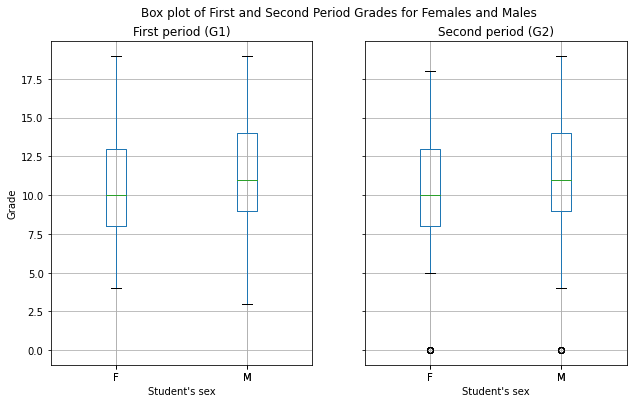

In [153]:
# Create a box plot for two of the numeric variables across one of the
# categorical variables

box_plot = math_data.boxplot(column=["G1", "G2"], by=["sex"], figsize=(10, 6))
plt.suptitle('Box plot of First and Second Period Grades for Females and Males')
box_plot[0].set_xlabel("Student's sex")
box_plot[0].set_title("First period (G1)")
box_plot[0].set_ylabel("Grade")
box_plot[1].set_title("Second period (G2)")
box_plot[1].set_xlabel("Student's sex")

Text(0, 0.5, 'Final grade')

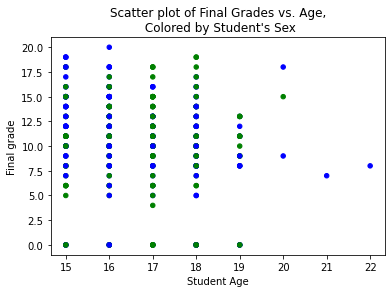

In [178]:
# Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). 
# Color the points by a categorical variable in each. 
# Add appropriate labels and titles.

# Create our own color vector using list comprehension
color_vec = ["blue" if sex == "M" else "green" for sex in math_data.sex]
math_data["var_color"] = color_vec

# Plot age vs. G3 grades using color vector
scatter_age = math_data.plot.scatter(x="age", y="G3", c ="var_color", cmap="viridis", title="Scatter plot of Final Grades vs. Age,\n Colored by Student's Sex")
scatter_age.set_xlabel("Student Age")
scatter_age.set_ylabel("Final grade")

Text(0, 0.5, 'Final grade')

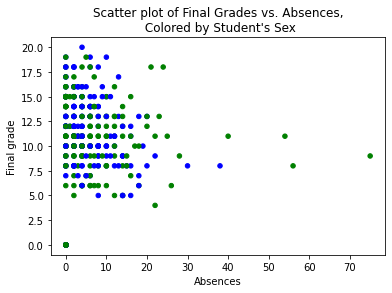

In [177]:
# Plot age vs. G3 grades using color vector
scatter_absences = math_data.plot.scatter(x="absences", y="G3", c ="var_color", cmap="viridis", title="Scatter plot of Final Grades vs. Absences,\n Colored by Student's Sex")
scatter_absences.set_xlabel("Absences")
scatter_absences.set_ylabel("Final grade")

## Part 2 - Summarizing World Development

### Task 1 - Read in the Data

In [179]:
# Read in local file
world_dev_indicators = pd.read_excel("WorldDevelopmentIndicators.xlsx", sheet_name="Data")
world_dev_indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2000,73.702495
1,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2001,74.944860
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2002,76.258066
3,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2003,77.120464
4,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2004,78.094440


### Task 2 - Summarize the data